<!-- ---
title: Biostat/Biomath M257 Homework 1
subtitle: Due Apr 12 @ 11:59PM
author: Tomoki Okuno and 805851067
date: today
format:
  html:
    theme: cosmo
    embed-resources: true
    number-sections: false
    toc: true
    toc-depth: 4
    toc-location: left
--- -->
Biostat/Biomath M257 Homework 1

Due Apr 19 @ 11:59PM

Tomoki Okuno and 805851067

Show machine information for reproducibility:

In [13]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39b (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 × Apple M1
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
  Threads: 2 on 4 virtual cores


Activate environment:

In [14]:
using Pkg
# Pkg.add("IJulia")
Pkg.activate(pwd())
Pkg.instantiate()
# add packages if needed
# Pkg.add(["BenchmarkTools", "LinearAlgebra", "Plots", "Random"])
Pkg.add("RCall")
Pkg.status()

  Activating project at `~/Documents/07_UCLA/Class/257/02_Homework/hw1`
   Resolving package versions...
  No Changes to `~/Documents/07_UCLA/Class/257/02_Homework/hw1/Project.toml`
  No Changes to `~/Documents/07_UCLA/Class/257/02_Homework/hw1/Manifest.toml`


Status `~/Documents/07_UCLA/Class/257/02_Homework/hw1/Project.toml`
  [6e4b80f9] BenchmarkTools v1.5.0
  [7073ff75] IJulia v1.24.2
  [bdcacae8] LoopVectorization v0.12.169
  [91a5bcdd] Plots v1.40.3
  [f27b6e38] Polynomials v4.0.6
  [6f49c342] RCall v0.14.1
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random


In [15]:
using Plots, Random, LinearAlgebra

## Q1. Git/GitHub

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

    I already have my GitHub account.

2. Create a **private** repository `biostat-m257-2024-spring` and add `Hua-Zhou` and `BrendonChau` (TA) as your collaborators.

    Done.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, `Project.toml`, all code and data set to reproduce results) in the `master` branch. 

    Understood and and created `hw1` in `main` branch instead of `master`.

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.

    Sure. I tagged my hw1 submission.

5. Read the [style guide](https://github.com/invenia/BlueStyle) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (1) four space indenting rule, (2) 92 charcter rule, (3) space after comma rule, (4) no space before comma rule, (5) space around binary operator rule.

    Read it.

## Q2. Computer arithmetics

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

Q2.1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

**Solution**

In [16]:
x, y, z = 0.1, 0.1, 1.0

println("LHS: ", (x + y) + z)
println("RHS: ", x + (y + z))
println("Match?: ", (x + y) + z == x + (y + z))

LHS: 1.2
RHS: 1.2000000000000002
Match?: false


The two computation results did not match. The discrepancy arises due to floating-point arithmetic and rounding errors. Since floating-point numbers have limited precision, computations involving them may not yield exact results. 

Q2.2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

**Solution**

While the equation generally holds true, there exists a counter-example due to the limitations of floating-point numbers.

In [17]:
x, y, z = 0.1, 0.2, 0.3

println("LHS: ", (x * y) * z)
println("RHS: ", x * (y * z))
println("Match?: ", (x * y) * z == x * (y * z))

LHS: 0.006000000000000001
RHS: 0.006
Match?: false


We observe that floating-point numbers do not always obey the associative rule for multiplication. Thus, the answer is **No**.

Q2.3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`? 

**Solution**

There is a counter-example.

In [18]:
a = 0.1
x, y = 0.025, 0.051

println("LHS: ", a * (x + y))
println("RHS: ", a * x + a * y)
println("Match?: ", a * (x + y) == a * x + a * y)

LHS: 0.0076
RHS: 0.007600000000000001
Match?: false


Thus, floating-point numbers do not necessarily obey the distributive rule. The answer is **No**.

Q2.4. Is `0 * x == 0` true for all floating-point number `x`? 

**Solution**

I found that, according to the definition, multiplying any number by 0 results in 0.

In [19]:
x = 1e-100
0 * x == 0

true

Exceptions to this rule include infinity and `NaN`.

In [20]:
x = Inf
println("LHS: ", 0 * x)
println("Match?: ", 0 * x == 0)

LHS: NaN
Match?: false


In [21]:
x = NaN
println("LHS: ", 0 * x)
println("Match?: ", 0 * x == 0)

LHS: NaN
Match?: false


The product of zero and `Inf` is `NaN`, which makes sense mathematically. Therefore, `0 * x == 0` is not necessarily true, that is, **false**.

Q2.5. Is `x / a == x * (1 / a)` always true?

**Solution**

To find one counter-example, we do iterative calculation as follows.

In [22]:
# Initialize variables to store an example where x / a != x * (1 / a)
found_x = 0.0
found_a = 0.0
direct_division_result = 0.0
multiplication_result = 0.0

# Loop through a range of floating-point numbers
for x in 1:10000 
    for a in 1:10000
        x_float = x / 10000.0
        a_float = a / 10000.0
        # Perform direct division
        direct_division = x_float / a_float
        # Perform multiplication after division
        mult_after_div = x_float * (1 / a_float)
        # Check if the results are different
        if direct_division != mult_after_div
            found_x = x_float
            found_a = a_float
            direct_division_result = direct_division
            multiplication_result = mult_after_div
            break  # Exit the loop once an example is found
        end
    end
    if found_x != 0.0  # Check if an example has been found
        break
    end
end

println("x: $found_x, a: $found_a")
println("LHS: $direct_division_result")
println("RHS: $multiplication_result")

x: 0.0001, a: 0.0019
LHS: 0.052631578947368425
RHS: 0.05263157894736842


Sanity check:

In [23]:
x, a = 0.0001, 0.0019
x / a == x * (1 / a)

false

Thus, `x / a == x * (1 / a)` is also **false**.

## Q3. Multiple dispatch and JIT

Q3.1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input. 

**Solution**

In [24]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
@code_llvm g(1)

;  @ In[24]:1 within `g`
define i64 @julia_g_2145(i64 signext %0) #0 {
top:
;  @ In[24]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[24]:5 within `g`
  ret i64 %2
}


In [25]:
println("%1 = mul calculate ", 5^10)
println("%2 = add calculate ", -sum(5 .^ (0:9)))

%1 = mul calculate 9765625
%2 = add calculate -2441406


Q3.2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input. 

**Solution**

In [26]:
@code_llvm g(1.0)

;  @ In[24]:1 within `g`
define double @julia_g_2181(double %0) #0 {
top:
;  @ In[24]:3 within `g`
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %10 = fadd double %9, -1.000000e+00

Q3.3. Compare the bitcode from questions 1 and 2. Explain what do you find.

**Solution**

Overall, the computation process seems to differ between floating-point number and integer. In the case of floating-point arguments, both multiplication (`5k`) and subtraction (`-1`) are performed within each iteration of the loop. However, for integer arguments, both calculations are executed in a single operation by reordering or combining operations, which should be more efficient.

Specifically, I believe that `9765625` is derived from $5^{10}$ and `-2441406` comes from $- \sum_{i=1}^{10} 5^{i-1}$.

Q3.4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

In [27]:
function g_fastmath(k)
    @fastmath for i in 1:10 
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

**Solution**

I read Julia documantation on `@fastmath`. Repeat the Q3.1-3 as follows.

In [28]:
## Repeat Q3.1
@code_llvm g_fastmath(1)

;  @ In[27]:1 within `g_fastmath`
define i64 @julia_g_fastmath_2217(i64 signext %0) #0 {
top:
;  @ In[27]:3 within `g_fastmath`
; ┌ @ fastmath.jl:269 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:269 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[27]:5 within `g_fastmath`
  ret i64 %2
}


In [29]:
## Repeat Q3.2
@code_llvm g_fastmath(1.0)

;  @ In[27]:1 within `g_fastmath`
define double @julia_g_fastmath_2219(double %0) #0 {
top:
;  @ In[27]:3 within `g_fastmath`
; ┌ @ fastmath.jl:266 within `mul_fast` @ fastmath.jl:165
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:266 within `sub_fast` @ fastmath.jl:164
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[27]:5 within `g_fastmath`
  ret double %2
}


(Repeat Q3.2) `g_fastmath` with `Float64` input appears to execute a similar efficient process to `g` and `g_fastmath` with `Int64` input, i.e., only one multiplication and one addition. 

Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

**Solution**

`@fastmath` allows sacrificing some mathematical rigor for the purpose of accelerating numerical computations. The bitcodes for `g` and `g_fastmath` with `Float64` input are different because the `@fastmath` macro ignores limited precision that floating-point numbers have, as we saw in Q2. In the `g_fastmath` function, the `@fastmath` allows the compiler to apply optimizations such as reordering or combining floating-point operations like with `Int64` input, which may result in a loss of mathematical precision but can lead to faster execution. As a result, `@code_llvm` generated for `g_fastmath` differ from that of `g` due to these optimizations permitted by `@fastmath`.

## Q4. Evaluating a polynomial

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

In [30]:
x = range(0.988, stop = 1.012, step = 0.001)

0.988:0.001:1.012

Check some elements in `x` to see if it works.

In [31]:
println(x[1])
println(x[11])
println(x[25]) # last value

0.988
0.998
1.012


Q4.1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.

**Solution**

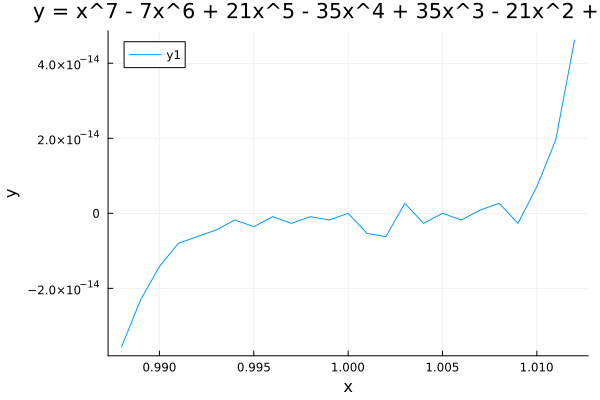

In [32]:
y = x .^ 7 - 7x .^ 6 + 21x .^ 5 - 35x .^ 4 + 35x .^ 3 - 21x .^ 2 + 7x .- 1
plot(x, y, xlabel = "x", ylabel = "y", 
    title = "y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1")

Q4.2. Plot the polynomial `y = (x - 1)^7` at points `x`. 

**Solution**

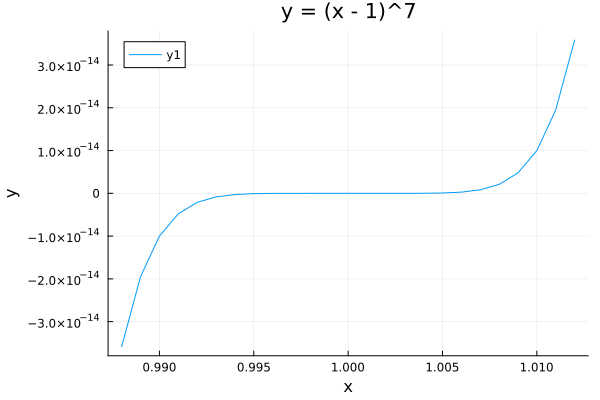

In [24]:
y = (x .- 1).^7
plot(x, y, xlabel = "x", ylabel = "y", title = "y = (x - 1)^7")

Q4.3. Explain what you found.

**Solution**

Obviously, `y = (x - 1)^7` provided more accurate (smooth) plots. On the contrary, the roughness of the other plots can be attributed to cumulative rounding errors from many arithmetic operations.

## Q5. Woodbury formula

Demonstrate the following results in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Q5.1. **Sherman-Morrison formula**:
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

**Solution.**

Proving this is straightforward. Use the fact that $(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = (\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}(\mathbf{A} + \mathbf{u} \mathbf{u}^T) =\mathbf I_n$.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}
	&= (\mathbf{A} + \mathbf{u} \mathbf{u}^T)\left[\mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}
	- \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} 
	- \frac{(\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1})(\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1})}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\\
	&= \mathbf I_n
	+ \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}(\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u})}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} 
	- \frac{\mathbf{u} (\mathbf{u}^T \mathbf{A}^{-1}\mathbf{u}) \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\\
	& = \mathbf I_n
\end{align*}
$$
since $\mathbf{u}^T \mathbf{A}^{-1}\mathbf{u}$ is scalar. The same holds true for $(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}(\mathbf{A} + \mathbf{u} \mathbf{u}^T) =\mathbf I_n$. Let's demonstrate this formula.

In [25]:
## set dimension
n = 5
## set seed number for reproducibility
Random.seed!(257)

## create a random matrix A and a random vector u
A = rand(n, n)
u = rand(n)

## compute the inverse of A + uu'
inv(A + u * u')

5×5 Matrix{Float64}:
 -3.82769    4.21818   1.49492    1.31681   -3.15513
  2.6669    -1.69853  -0.619175  -0.828194   0.877865
  4.95506   -5.11298  -3.31178    0.051452   4.10314
  0.371063  -1.04998   0.760928  -0.235422   0.636954
 -2.70264    2.38692   1.19319   -0.494644  -0.445729

In [26]:
## check two transpose functions
transpose(u) == u'

true

In [27]:
## compute Sherman-Morrison formula
inv(A) - inv(A) * u * u' * inv(A) / (1 + u' * inv(A) * u)

5×5 Matrix{Float64}:
 -3.82769    4.21818   1.49492    1.31681   -3.15513
  2.6669    -1.69853  -0.619175  -0.828194   0.877865
  4.95506   -5.11298  -3.31178    0.051452   4.10314
  0.371063  -1.04998   0.760928  -0.235422   0.636954
 -2.70264    2.38692   1.19319   -0.494644  -0.445729

In [28]:
## check for approximate equality 
isapprox(inv(A + u * u'), inv(A) - inv(A) * u * u' * inv(A) / (1 + u' * inv(A) * u))

true

The two calculation results did not align numerically, but they were nearly identical.

Q5.2. **Woodbury formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solution.**

The mathmetical proof is similar to part 1 since part 2 is a more general case.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1}
	&= (\mathbf{A} + \mathbf{U} \mathbf{V}^T)\left[\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} 
	- \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U}(\mathbf I_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} \\
	&= \mathbf I_n.
\end{align*}
$$

In [4]:
## set dimension
n = 8
m = 2

## create a random (nonsingular) matrix A and a random vector u
A = rand(n, n)
U = rand(n, m)
V = rand(n, m)

## compute the inverse of A + UV'
inv(A + U * V')

8×8 Matrix{Float64}:
 -10.9644      -8.33498    63.1288   …  -31.7862   -2.40431    -42.7766
  20.0767      12.3426   -113.654        56.9763    7.50491     78.3732
 -30.6189     -18.5611    168.462       -82.1664   -9.54632   -114.807
  -0.0815822    1.52816    -4.57552       2.63409   1.74856      3.33842
   5.70231      3.04669   -27.7054       13.3876   -0.127095    19.9244
  12.5369       6.1527    -65.6843   …   31.6155    2.44613     45.0401
 -12.195       -7.62298    70.8034      -34.771    -3.37391    -50.1676
  15.38        11.8645    -92.0821       45.5404    5.41147     62.4999

In [5]:
## compute Woodbury formula
inv(A) - inv(A) * U * inv(I + V' * inv(A) * U) * V' * inv(A)

8×8 Matrix{Float64}:
 -10.9644      -8.33498    63.1288   …  -31.7862   -2.40431    -42.7766
  20.0767      12.3426   -113.654        56.9763    7.50491     78.3732
 -30.6189     -18.5611    168.462       -82.1664   -9.54632   -114.807
  -0.0815822    1.52816    -4.57552       2.63409   1.74856      3.33842
   5.70231      3.04669   -27.7054       13.3876   -0.127095    19.9244
  12.5369       6.1527    -65.6843   …   31.6155    2.44613     45.0401
 -12.195       -7.62298    70.8034      -34.771    -3.37391    -50.1676
  15.38        11.8645    -92.0821       45.5404    5.41147     62.4999

In [6]:
## check for approximate equality 
isapprox(inv(A + U * V'), inv(A) - inv(A) * U * inv(I + V' * inv(A) * U) * V' * inv(A))

true

We finished the demonstration.

Q5.3. **Binomial inversion formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

**Solution**

Note $\mathbf{B} \in \mathbb{R}^{m \times m}$. The proof is almost the same as part 2, which is a special case of part 3.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1}
	&= (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)\left[\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} 
	- \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U}\mathbf{B}(\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n.
\end{align*}
$$

In [7]:
## create a random (nonsingular) matrix B
B = rand(m, m)

## compute the inverse of A + UBV'
inv(A + U * B * V')

8×8 Matrix{Float64}:
 -0.593391  -0.68268   -1.70306  …   0.491193   1.44368    1.87353
  1.5503    -1.75174    2.2075      -0.970209   0.940924  -1.18748
 -3.28271    1.93589   -2.46034      3.13274    0.357759   2.72866
 -0.703285   1.11241   -0.69394      0.728275   1.48651    0.641498
  1.04731   -0.296605   1.38394     -1.03819   -1.921     -0.159943
  1.70225   -1.83469    2.04525  …  -2.10019   -1.57904   -1.60964
 -0.403476   1.18045   -2.92044      1.99729    0.925999   0.549817
  0.401706   0.793251   1.5535      -1.08944   -0.131813  -1.97689

In [8]:
## compute the Binomial inversion formula
inv(A) - inv(A) * U * inv(inv(B) + V' * inv(A) * U) * V' * inv(A)

8×8 Matrix{Float64}:
 -0.593391  -0.68268   -1.70306  …   0.491193   1.44368    1.87353
  1.5503    -1.75174    2.2075      -0.970209   0.940924  -1.18748
 -3.28271    1.93589   -2.46034      3.13274    0.357759   2.72866
 -0.703285   1.11241   -0.69394      0.728275   1.48651    0.641498
  1.04731   -0.296605   1.38394     -1.03819   -1.921     -0.159943
  1.70225   -1.83469    2.04525  …  -2.10019   -1.57904   -1.60964
 -0.403476   1.18045   -2.92044      1.99729    0.925999   0.549817
  0.401706   0.793251   1.5535      -1.08944   -0.131813  -1.97689

In [33]:
## check for approximate equality
LHS = inv(A + U * B * V')
RHS = inv(A) - inv(A) * U * inv(inv(B) + V' * inv(A) * U) * V' * inv(A)
isapprox(LHS, RHS)

true

Q5.4. **Determinant identity**:
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solution**

First, need to show an important determinant proporty: $\det(\mathbf I_n + \mathbf{PQ}) = \det(\mathbf I_m + \mathbf{QP})$, where $\mathbf P\in\mathbb R^{n\times m}$ and $\mathbf Q\in\mathbb R^{m\times n}$.
$$
\begin{align*}
    |\mathbf I_n + \mathbf{PQ}| &=
    \begin{vmatrix}
    \mathbf I_n + \mathbf{PQ} & \mathbf O_{n\times m}\\
    \mathbf Q & \mathbf I_m
    \end{vmatrix}\\
    &= \begin{vmatrix}
    \mathbf I_n & \mathbf P\\
    \mathbf O_{m\times n} & \mathbf I_m
    \end{vmatrix}
    \begin{vmatrix}
    \mathbf I_n & - \mathbf P\\
    \mathbf Q & \mathbf I_m
    \end{vmatrix}\\
    &= \begin{vmatrix}
    \mathbf I_n & - \mathbf P\\
    \mathbf Q & \mathbf I_m
    \end{vmatrix}
    \begin{vmatrix}
    \mathbf I_n & \mathbf P\\
    \mathbf O_{m\times n} & \mathbf I_m
    \end{vmatrix}\\
    &= \begin{vmatrix}
    \mathbf I_n & \mathbf O_{n\times m}\\
    \mathbf Q & \mathbf I_m + \mathbf{QP}
    \end{vmatrix}\\
    &= |\mathbf I_m + \mathbf{QP}|.
\end{align*}
$$
Also, we have $\mathbf A = \mathbf A^{1/2}\mathbf A^{1/2} \succ \mathbf O$ (i.e., $\mathbf A^{-1/2}$ exists). Using them, we can show the determinant identity as follows.
$$
\begin{align*}
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T)
	&= \det(\mathbf{A}^{1/2}) \text{det}(\mathbf{I}_n + \mathbf A^{-1/2}\mathbf{U} \mathbf{V}^T\mathbf A^{-1/2})\det(\mathbf{A}^{1/2})\\
	&= \det(\mathbf{A}) \det(\mathbf{I}_m + \mathbf{V}^T\mathbf A^{-1/2}\mathbf A^{-1/2}\mathbf{U})\\
	&= \det(\mathbf{A}) \det(\mathbf{I}_m + \mathbf{V}^T\mathbf A^{-1}\mathbf{U}).
\end{align*}
$$

In [35]:
println("LHS: ", det(A + U * V'))
println("RHS: ", det(A) * det(I + V' * inv(A) * U))

LHS: 0.024280646193237748
RHS: 0.024280646193237745


In [36]:
isapprox(det(A + U * V'), det(A) * det(I + V' * inv(A) * U))

true

## Q6. Triangular matrix and orthogonal matrix

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

Q6.1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

**Solution**

In [34]:
## set dimension
n = 5

## create random upper triangular matrix A and B
A = UpperTriangular(rand(n, n))
B = UpperTriangular(rand(n, n))

## display A and B
display(A)
display(B)

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.562252  0.180614  0.741707  0.121506  0.096343
  ⋅        0.405571  0.837735  0.989185  0.325227
  ⋅         ⋅        0.644318  0.102387  0.434974
  ⋅         ⋅         ⋅        0.487408  0.370212
  ⋅         ⋅         ⋅         ⋅        0.713407

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.375688  0.607144  0.937406  0.0333211  0.893589
  ⋅        0.534555  0.298292  0.807758   0.812896
  ⋅         ⋅        0.667448  0.706065   0.980346
  ⋅         ⋅         ⋅        0.758999   0.254745
  ⋅         ⋅         ⋅         ⋅         0.713918

In [35]:
## The product of two upper triangular matrices
A * B

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.211232  0.437916  1.07598   0.780543  1.47611
  ⋅        0.2168    0.680123  1.66989   1.63513
  ⋅         ⋅        0.430049  0.532642  0.968272
  ⋅         ⋅         ⋅        0.369942  0.388466
  ⋅         ⋅         ⋅         ⋅        0.509314

The same is true for lower triangular matrices:

In [39]:
## lower matrix version
A = LowerTriangular(rand(n, n))
B = LowerTriangular(rand(n, n))
display(A)
display(B)
A * B

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.437546    ⋅          ⋅          ⋅         ⋅ 
 0.952232   0.0830385   ⋅          ⋅         ⋅ 
 0.177262   0.434459   0.762262    ⋅         ⋅ 
 0.0807067  0.143301   0.677514   0.480705   ⋅ 
 0.52718    0.54111    0.0693748  0.493392  0.316633

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.791105   ⋅          ⋅          ⋅          ⋅ 
 0.52458   0.0613531   ⋅          ⋅          ⋅ 
 0.093031  0.477315   0.988838    ⋅          ⋅ 
 0.110684  0.494877   0.478944   0.0330324   ⋅ 
 0.133828  0.629342   0.0373603  0.938369   0.787347

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.346145   ⋅           ⋅         ⋅          ⋅ 
 0.796876  0.00509467   ⋅         ⋅          ⋅ 
 0.439055  0.390494    0.753753   ⋅          ⋅ 
 0.255257  0.57007     0.900183  0.0158789   ⋅ 
 0.80435   0.509751    0.316737  0.313417   0.2493

Q6.2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.


In [50]:
## set dimension
n = 5

## create random upper triangular matrix A
A = UpperTriangular(rand(n, n))
display(A)
display(inv(A))

## create random lower triangular matrix A
B = LowerTriangular(rand(n, n))
display(B)
display(inv(B))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.0450822  0.586559  0.724644  0.886489  0.315674
  ⋅         0.870778  0.953903  0.745325  0.150654
  ⋅          ⋅        0.23603   0.190556  0.449126
  ⋅          ⋅         ⋅        0.917191  0.438478
  ⋅          ⋅         ⋅         ⋅        0.725793

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 22.1817  -14.9417  -7.71484  -7.69451     2.87635
   ⋅        1.1484  -4.64119   0.0310505   2.61487
   ⋅         ⋅       4.23675  -0.880231   -2.08995
   ⋅         ⋅        ⋅        1.09029    -0.658681
   ⋅         ⋅        ⋅         ⋅          1.3778

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.685916    ⋅         ⋅          ⋅         ⋅ 
 0.0761696  0.445428   ⋅          ⋅         ⋅ 
 0.0919889  0.639407  0.842752    ⋅         ⋅ 
 0.0865848  0.218382  0.0691558  0.902434   ⋅ 
 0.906902   0.367416  0.861607   0.643249  0.394274

5×5 LowerTriangular{Float64, Matrix{Float64}}:
  1.4579       ⋅          ⋅           ⋅        ⋅ 
 -0.249306    2.24503     ⋅           ⋅        ⋅ 
  0.0300172  -1.70333    1.18659      ⋅        ⋅ 
 -0.08185    -0.412749  -0.0909312   1.10811   ⋅ 
 -3.05318     2.30358   -2.4447     -1.80786  2.53631

These demonstrations are consistent with the mathematical argument.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

Q6.6. The product of two orthogonal matrices is orthogonal.

**Solution**

Mathemetical proof is straightforward. Assume that $\mathbf Q_1$ and $\mathbf Q_2$ are orthogonal, then
$$
\begin{align*}
\mathbf Q_1\mathbf Q_2(\mathbf Q_1\mathbf Q_2)' &= \mathbf Q_1(\mathbf Q_2\mathbf Q_2')\mathbf Q_1' = \mathbf Q_1\mathbf Q_1' = \mathbf I\\
(\mathbf Q_1\mathbf Q_2)'\mathbf Q_1\mathbf Q_2 &= \mathbf Q_2'(\mathbf Q_1'\mathbf Q_1)\mathbf Q_2 = \mathbf Q_2'\mathbf Q_2 = \mathbf I,
\end{align*}
$$
proving that $\mathbf Q_1\mathbf Q_2$ is also orthogonal.

In [46]:
## get Q1 by QR decomposition
A = rand(n,n)
Q1, R1 = qr(A)

## get Q2 by QR decomposition
B = rand(n,n)
Q2, R2 = qr(A)

## check for the orthogonality of Q = Q1 * Q2
Q = Q1 * Q2
isapprox(Q * Q', I), isapprox(Q' * Q, I)

(true, true)

The orthogonality of $\mathbf Q = \mathbf Q_1\mathbf Q_2$ was shown by checking the definition.

## Q7. Looping

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  

Q7.1. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 4 ways, e.g., $ij$-looping, $ji$-looping, [comprehension](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions), and vectorization (R style). Compute and print `H` for `n = 5`.   

**Solution**

In [41]:
## ij-looping
function h1(n)
    H = zeros(n, n)
    for i in 1:n
        for j in 1:n
            H[i, j] = 1 / (i + j - 1)
        end
    end
    return H
end
h1(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [42]:
## ji-looping
function h2(n)
    H = zeros(n, n)
    for j in 1:n
        for i in 1:n
            H[i, j] = 1 / (i + j - 1)
        end
    end
    return H
end
h2(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [43]:
## comprehension

In [44]:
## vectorization (R style)


Q7.2. Compare their speed and memory efficiencies using `BenchmarkTools.jl` at `n = 5000`.

**Solution**

In [45]:
using BenchmarkTools
n = 5000

@benchmark h1($n)

In [ ]:
@benchmark h2($n)

BenchmarkTools.Trial: 125 samples with 1 evaluation.
 Range (min … max):  32.535 ms … 149.244 ms  ┊ GC (min … max):  0.00% … 75.47%
 Time  (median):     37.878 ms               ┊ GC (median):    10.96%
 Time  (mean ± σ):   40.216 ms ±  14.300 ms  ┊ GC (mean ± σ):  10.45% ± 10.46%

    █▁                                                          
  █▆███▆▃▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂ ▂
  32.5 ms         Histogram: frequency by time          148 ms <

 Memory estimate: 190.73 MiB, allocs estimate: 2.